In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd
import pandas_datareader as pdr
import tensorflow
import keras
from keras.preprocessing import sequence
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import time
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.svm import SVR, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools
from statsmodels.tsa.arima_model import ARIMA
import math
from pandas.plotting import lag_plot



In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [3]:
import yfinance as yf
import datetime

ticker = 'HDFCBANK.NS'
start_date = datetime.datetime(2022, 1, 1)
end_date = datetime.datetime(2024, 2, 21)

df = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,1485.000000,1523.000000,1480.500000,1519.650024,1485.152466,4534592
2022-01-04,1520.000000,1532.900024,1507.800049,1528.550049,1493.850464,4428676
2022-01-05,1536.800049,1572.000000,1528.099976,1564.849976,1529.326294,7166319
2022-01-06,1543.000000,1554.750000,1530.050049,1539.750000,1504.796265,4814465
2022-01-07,1544.000000,1566.750000,1535.900024,1550.550049,1515.351074,5589692
...,...,...,...,...,...,...
2024-02-14,1376.000000,1391.500000,1363.550049,1384.050049,1384.050049,45660405
2024-02-15,1385.000000,1415.500000,1384.349976,1414.050049,1414.050049,20792472
2024-02-16,1423.900024,1427.699951,1408.449951,1419.900024,1419.900024,16087871


In [5]:
df.shape

(528, 6)

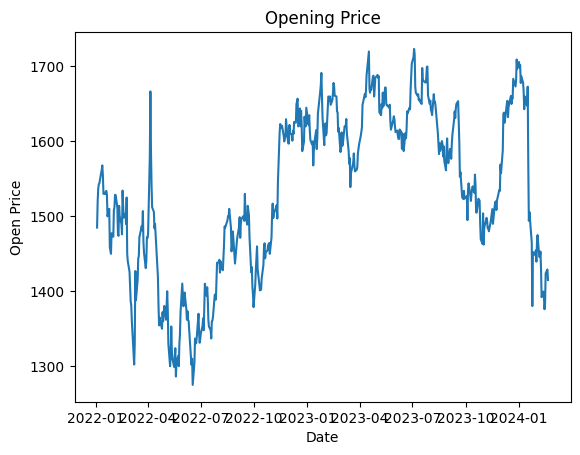

In [6]:
plt.figure()
plt.title('Opening Price')
plt.plot(df['Open'])
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.show()

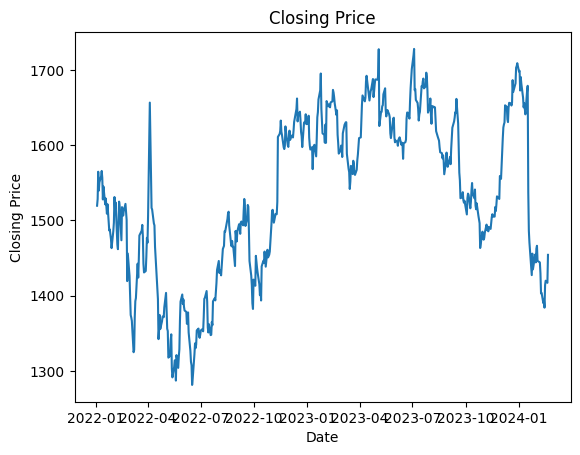

In [7]:
plt.figure()
plt.title('Closing Price')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

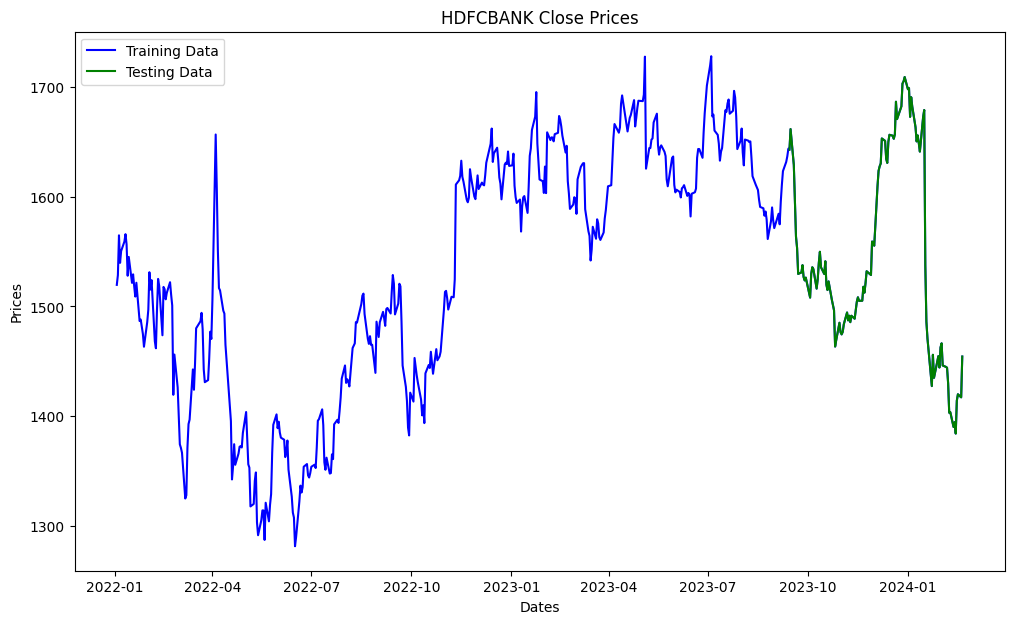

In [8]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('HDFCBANK Close Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close'], 'blue', label='Training Data')
plt.plot(test_data['Close'], 'green', label='Testing Data')
plt.legend()

In [9]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()

for t in range(len(test_ar)):
    model = ARIMA(history, order=(1, 1, 1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)




<class 'list'>


In [19]:
error = mean_squared_error(test_ar, predictions)
print('Mean Squared Error: %.3f' % error)

error2 = smape_kun(test_ar, predictions)
print('Symmetric Mean Absolute Error: %.3f' % error2)


rmse = np.sqrt(mean_squared_error(test_ar, predictions))
mae = mean_absolute_error(test_ar, predictions)

print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

# Calculate accuracy percentage
accuracy_percentage = 100 - error2

print("Accuracy Percentage:", accuracy_percentage)



Mean Squared Error: 489.556
Symmetric Mean Absolute Error: 0.907
Root Mean Squared Error: 22.125918767833195
Mean Absolute Error: 14.027413654505711
Accuracy Percentage: 99.09270785202806


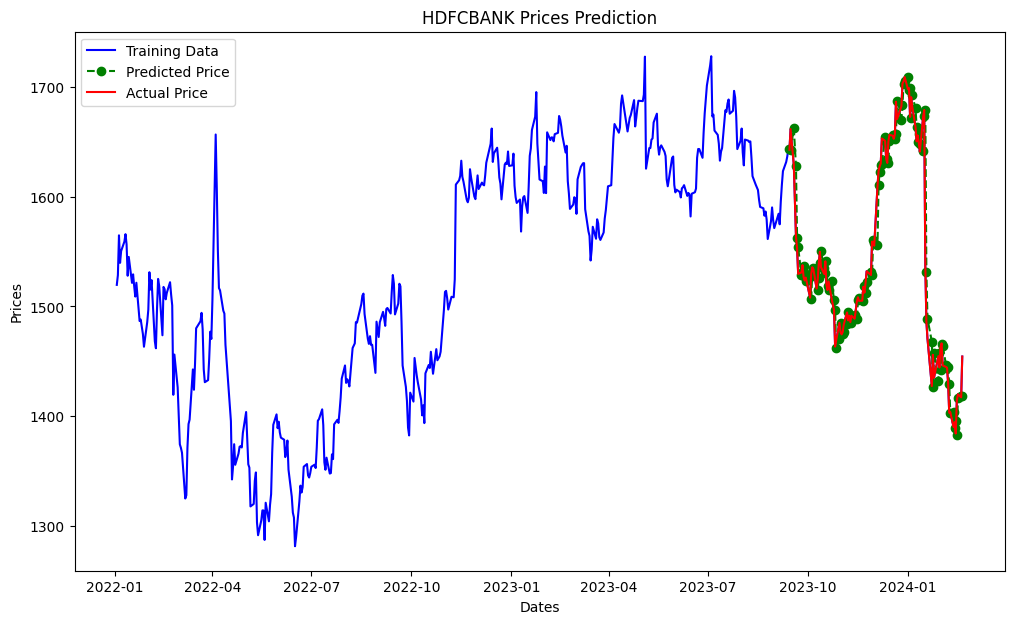

In [11]:
plt.figure(figsize=(12,7))
plt.plot(df['Close'],'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('HDFCBANK Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

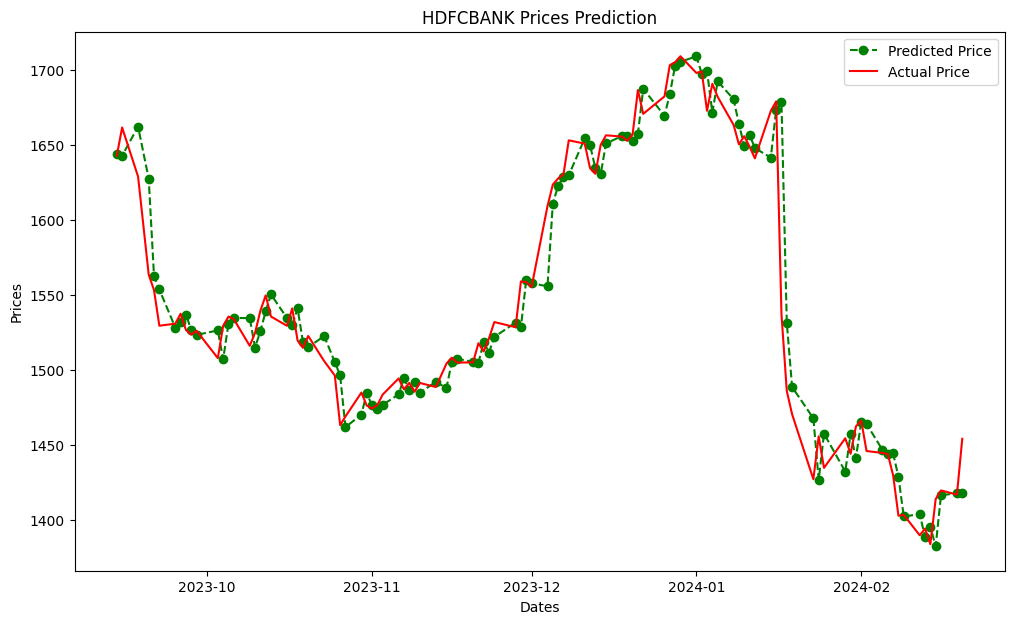

In [12]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('HDFCBANK Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [13]:
actual=pd.DataFrame()
actual=pd.DataFrame(test_ar,columns=["Actual"])
predicted=pd.DataFrame(list(predictions),columns=["Predicted"])
actual=actual.reset_index(drop=True)
predicted=predicted.reset_index(drop=True)
output=pd.concat([actual,predicted],axis=1)
print(output.head(10))

        Actual    Predicted
0  1642.900024  1643.814478
1  1661.750000  1642.937894
2  1629.050049  1662.300091
3  1563.699951  1627.675860
4  1553.349976  1562.671977
5  1529.650024  1553.793969
6  1531.000000  1528.432232
7  1537.650024  1532.009771
8  1526.849976  1537.088235
9  1523.699951  1526.898296


<h1><b>Getting Predictions for 60 days from now<b></h1>

In [14]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
ticker = 'HDFCBANK.NS'

# Assuming train_data and test_data are your datasets
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

# Using the entire dataset to train the model
model = ARIMA(train_ar, order=(5, 1, 2))
model_fit = model.fit()

# Forecasting 60 days ahead
forecast_dates = pd.date_range(start=df.index[-1], periods=61, freq='B')[1:]  # Assuming daily frequency, excluding today
forecast = model_fit.forecast(steps=60)
predicted_values_60_days = forecast

# Creating a DataFrame with dates and predicted values
predicted_df = pd.DataFrame({'Date': forecast_dates, 'Predicted_Close': predicted_values_60_days})

predicted_df.to_csv(f'pred.arima.{ticker}.csv', index=False)


# Printing the DataFrame
print(predicted_df)


         Date  Predicted_Close
0  2024-02-21      1643.408960
1  2024-02-22      1642.103219
2  2024-02-23      1640.743493
3  2024-02-26      1639.242726
4  2024-02-27      1637.513650
5  2024-02-28      1635.930876
6  2024-02-29      1634.536495
7  2024-03-01      1633.307022
8  2024-03-04      1632.236269
9  2024-03-05      1631.324376
10 2024-03-06      1630.553071
11 2024-03-07      1629.902686
12 2024-03-08      1629.356727
13 2024-03-11      1628.900270
14 2024-03-12      1628.519390
15 2024-03-13      1628.202020
16 2024-03-14      1627.937924
17 2024-03-15      1627.718378
18 2024-03-18      1627.535984
19 2024-03-19      1627.384528
20 2024-03-20      1627.258814
21 2024-03-21      1627.154496
22 2024-03-22      1627.067950
23 2024-03-25      1626.996161
24 2024-03-26      1626.936620
25 2024-03-27      1626.887240
26 2024-03-28      1626.846292
27 2024-03-29      1626.812336
28 2024-04-01      1626.784180
29 2024-04-02      1626.760834
30 2024-04-03      1626.741477
31 2024-

c:\Users\soham\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


c:\Users\soham\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


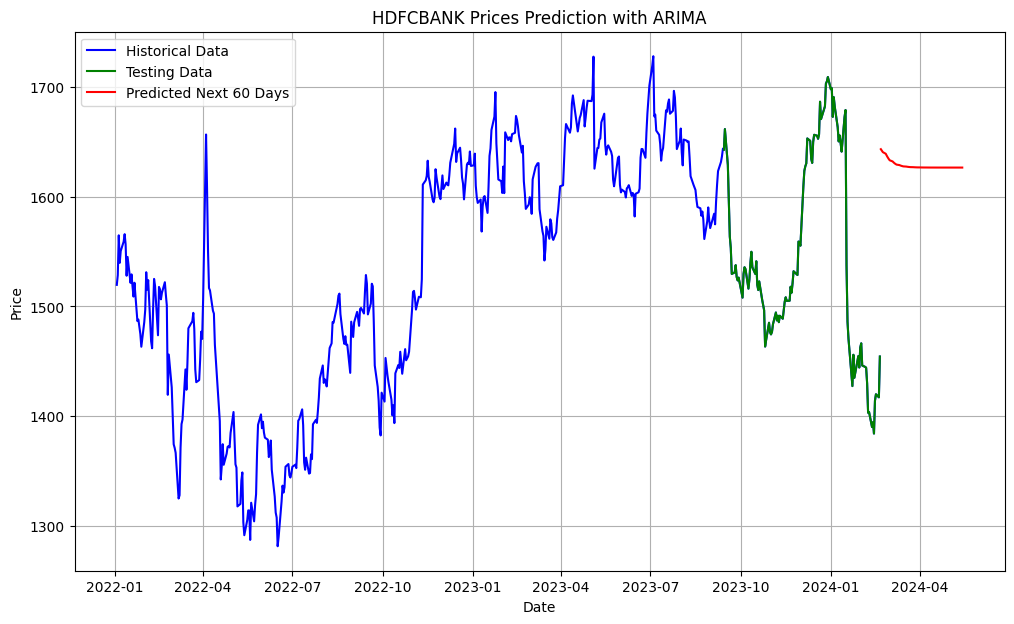

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Assuming train_data and test_data are your datasets
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

# Fitting the ARIMA model
model = ARIMA(train_ar, order=(5, 1, 2))  # Adjust order as needed
model_fit = model.fit()

# Forecasting 60 days ahead
forecast_steps = 60
forecast = model_fit.forecast(steps=forecast_steps)
predicted_values_60_days = forecast

# Creating a date range for the next 60 days
forecast_dates = pd.date_range(start=df.index[-1], periods=61, freq='B')[1:]  # Assuming daily frequency, excluding today

# Creating a DataFrame with dates and predicted values
predicted_df_arima = pd.DataFrame({'Date': forecast_dates, 'Predicted_Close': predicted_values_60_days})

# Plotting the overall data
plt.figure(figsize=(12, 7))
plt.plot(df.index, df['Close'], label='Historical Data', color='blue')
plt.plot(test_data.index, test_data['Close'], label='Testing Data', color='green')
plt.plot(predicted_df_arima['Date'], predicted_df_arima['Predicted_Close'], label='Predicted Next 60 Days', color='red')

# Adding titles and labels
plt.title('HDFCBANK Prices Prediction with ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
